In [93]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-attack-analysis-prediction-dataset/o2Saturation.csv
/kaggle/input/heart-attack-analysis-prediction-dataset/heart.csv


In [94]:
df1=pd.read_csv('/kaggle/input/heart-attack-analysis-prediction-dataset/o2Saturation.csv')
df1.head()
#df1.shape

#here there are vey few rows comparing to other dataset,so for now going to ignore other datasset

,98.6
0,98.6
1,98.6
2,98.6
3,98.1
4,97.5



## INFORMATION OF CLMS IN DATASETS
Age : Age of the patient

Sex : Sex of the patient

exang: exercise induced angina (1 = yes; 0 = no)

ca: number of major vessels (0-3)

cp : Chest Pain type chest pain type

Value 1: typical angina
Value 2: atypical angina
Value 3: non-anginal pain
Value 4: asymptomatic
trtbps : resting blood pressure (in mm Hg)

chol : cholestoral in mg/dl fetched via BMI sensor

fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

rest_ecg : resting electrocardiographic results

Value 0: normal
Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
thalach : maximum heart rate achieved

target : 0= less chance of heart attack 1= more chance of heart attack

In [95]:
df=pd.read_csv('/kaggle/input/heart-attack-analysis-prediction-dataset/heart.csv')
df.head()
#here it seems from coomunity discusstion and outputs that the target columns has been changeror tempered with

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [96]:
df.info()
#here we can see the null values present in the data set
#there are no null values
#all the columns are in int or float format though ,we can see that sex colomn is not described o,1

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [97]:
#we are dropin cp,fbs ,sex and output coloumn dor describe function 
df.drop(['sex','output','cp','fbs'],axis=1).describe()
#here you can see that many columns contain 0,1,2, values 
#for better understanding of the data we can drop this from the describe to

,age,trtbps,chol,restecg,thalachh,exng,oldpeak,slp,caa,thall
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,131.623762,246.264026,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531
std,9.082101,17.538143,51.830751,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277
min,29.000000,94.000000,126.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,120.000000,211.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000
50%,55.000000,130.000000,240.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000
75%,61.000000,140.000000,274.500000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000
max,77.000000,200.000000,564.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000



# EXPLORATORY DATA ANALYSIS


In [98]:
import matplotlib.pyplot as plt
import seaborn as sns


<AxesSubplot:xlabel='age', ylabel='count'>

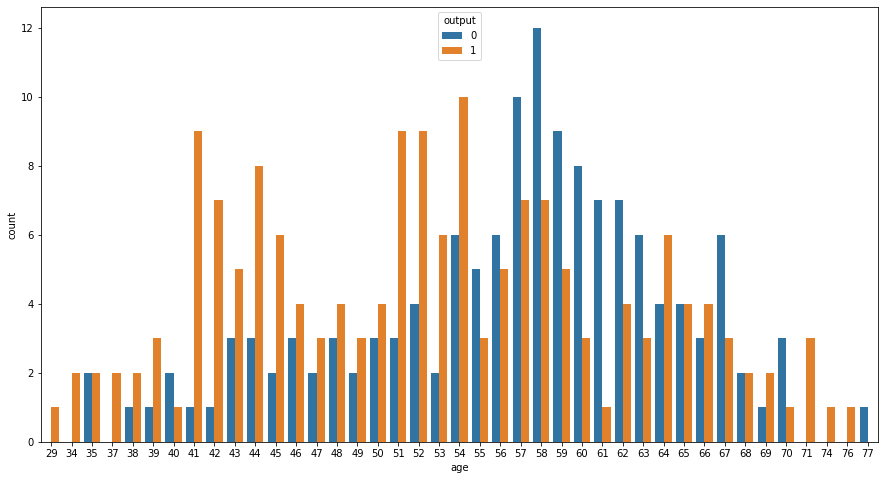

In [99]:

fig_dims = (15,8)
fig, ax = plt.subplots(figsize=fig_dims)
#sns.barplot(x = "names", y = "values", ax=ax, data=df)
sns.countplot(x=df.age,hue=df.output,ax=ax,)
#0=less chance of heart attack, 1=Higher chance

Text(0.5, 0, 'Cp')

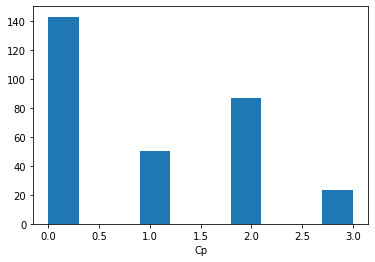

In [100]:
plt.hist(x=df['cp'])
plt.xlabel('Cp')
#here CP 0,1,2,3 repressent differnt types od agnima

<AxesSubplot:xlabel='sex', ylabel='count'>

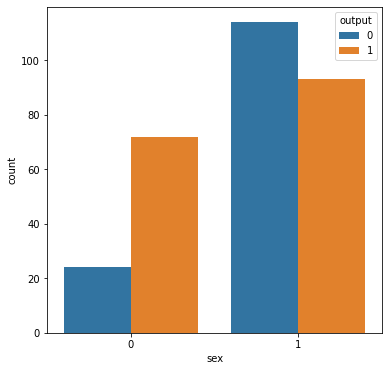

In [101]:
#we can see the relationship between output and sex 

fig_dims = (6,6)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(x=df.sex,hue=df.output,ax=ax,)
#here in the dataset we are not sure about which is male and female in 0,1 because of lack of information

In [102]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [103]:
df_cp=df[['cp','exng','output']].copy()

In [104]:
#now we will see the relation between cp(Chest pain) exng(excercise induced pain) and output
#Value 1: typical angina Value 2: atypical angina Value 3: non-anginal pain Value 4: asymptomatic trtbps : resting blood pressure (in mm Hg)
df_c = df[['cp', 'exng', 'output']].copy()
df_c['cp'] = df_c['cp'].map({0:'typical angina', 1:'atypical angina', 2:'non-anginal pain', 3:'asymptomatic'})
df_c['exng'] = df_c['exng'].map({0:'No', 1:'Yes'})
df_c.columns = ['Type of Chest Pain', 'Exercise Induced Angina', 'Chance of Heart Attack']
df_c['Chance of Heart Attack'] = df_c['Chance of Heart Attack'].map({0:'Lower', 1:'Higher'})
df_c.head()

,Type of Chest Pain,Exercise Induced Angina,Chance of Heart Attack
0,asymptomatic,No,Higher
1,non-anginal pain,No,Higher
2,atypical angina,No,Higher
3,atypical angina,No,Higher
4,typical angina,Yes,Higher


<AxesSubplot:xlabel='Type of Chest Pain', ylabel='count'>

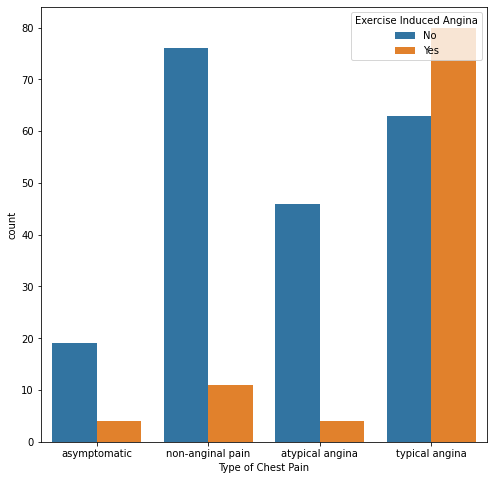

In [105]:
#realoising the relation betwwen chestpain and inuced agnima
fig_dims = (8,8)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(x=df_c['Type of Chest Pain'],hue=df_c['Exercise Induced Angina'],ax=ax,)
#one can see that there is a strong relation between typicalangina and exercise induced angina

<AxesSubplot:xlabel='Exercise Induced Angina', ylabel='count'>

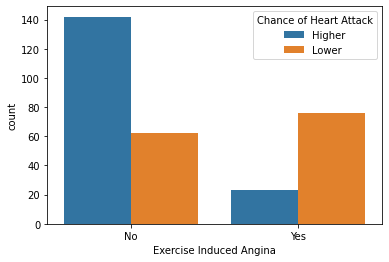

In [106]:
sns.countplot(x=df_c['Exercise Induced Angina'],hue=df_c['Chance of Heart Attack'])
#here we can see that where angina is not caused by exercise than the chamce of attack is higher
#which is quiety unsual

In [107]:
df.corr()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trtbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalachh,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exng,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


<AxesSubplot:>

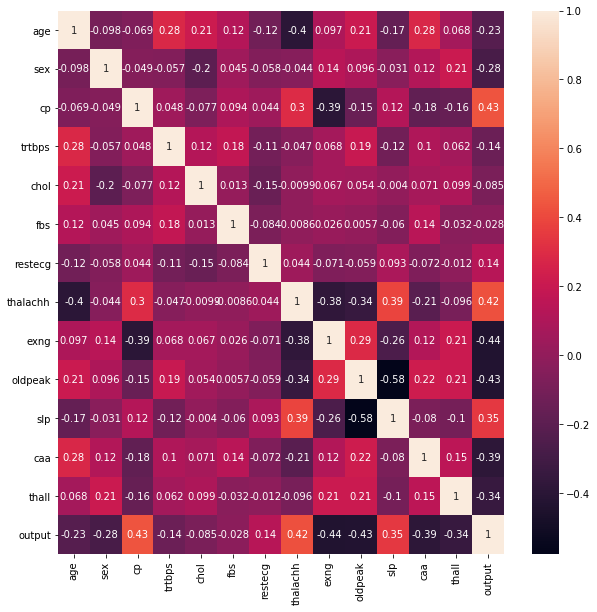

In [108]:
fig_dims = (10,10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.color_palette("flare", as_cmap=True)
sns.heatmap(df.corr(),annot=True)
#here we ploted the corelation plot for the better understanding of which feature is connected to output or target
#if mlore than one feature has higher co relation between than you can neglect that parameter for model
# we can see that thalachh as hiher relation foroutput lets see

In [109]:
#now we will se the relations between some other features and attribute ,lets see columns first
df.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

In [110]:
#we can chek the relationship beetween trtbps and chol
df['trtbps'].head()
df['chol'].head()
df_a=df[['trtbps','chol','output','thall']].copy()

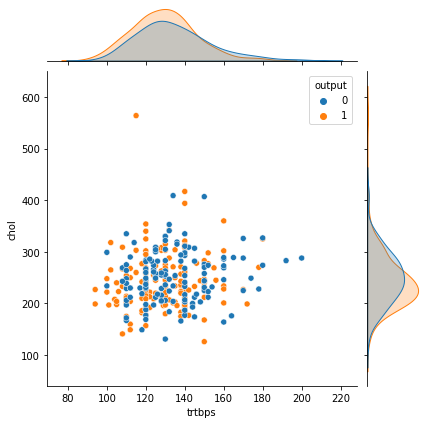

In [111]:
df_a.corr()
sns.jointplot(x = df_a['trtbps'], y = df_a['chol'],
              kind = "scatter", data = df_a,hue='output')
#sns.regplot(x=df_a['trtbps'],y = df_a['chol'])
#0-lower chance 1-higher chance

In [112]:
df_high=df[df['output']==1][['chol','output']]
df_high.head()
#now we can use describe function on chol to get more insights
df_high.describe()
#here we can see the min max and mean cholestrol levelfor higher chance of having a heart attacck


,chol,output
count,165.000000,165.0
mean,242.230303,1.0
std,53.552872,0.0
min,126.000000,1.0
25%,208.000000,1.0
50%,234.000000,1.0
75%,267.000000,1.0
max,564.000000,1.0


# Building Differnt ML models for given Problem

In [113]:
#Building data for ML models
from sklearn.model_selection import train_test_split

X=df.drop('output',axis=1).values
#type(X)
#X.shape
y=df['output'].values

In [114]:
# Split it to a 70:30 Ratio Train:Test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [115]:
# Normalize the data
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [116]:
#this only to see how the data set lokks like after normalization
df_train = pd.DataFrame(X_train)
df_train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-0.363789,0.724693,-1.001325,0.547064,0.900198,-0.382029,0.911051,1.041786,1.520691,0.450530,0.981845,-0.717331,1.165236
1,1.787963,0.724693,-1.001325,-0.045868,1.322780,-0.382029,-1.020377,-1.693836,-0.657596,1.137051,-0.657140,2.151992,-0.515241
2,-0.590290,0.724693,0.928501,-0.757387,-1.855775,-0.382029,-1.020377,-0.967186,-0.657596,-0.235992,0.981845,2.151992,-0.515241
3,1.448213,-1.379895,0.928501,1.258583,0.495988,-0.382029,0.911051,0.999042,-0.657596,-0.922513,0.981845,0.239110,-0.515241
4,-1.156540,-1.379895,0.928501,-1.350320,-2.002760,-0.382029,0.911051,1.127275,-0.657596,-0.407622,-0.657140,-0.717331,-0.515241


****Using Logistic Regression

In [117]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

model = LogisticRegression(solver='lbfgs')
model.fit(X_train, y_train)

predictions = model.predict(X_test)

print("Accuracy {0:.2f}%".format(100*accuracy_score(predictions, y_test)))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))
cm_lr=confusion_matrix(y_test, predictions)


Accuracy 83.52%
[[35 12]
 [ 3 41]]
              precision    recall  f1-score   support

           0       0.92      0.74      0.82        47
           1       0.77      0.93      0.85        44

    accuracy                           0.84        91
   macro avg       0.85      0.84      0.83        91
weighted avg       0.85      0.84      0.83        91



<AxesSubplot:>

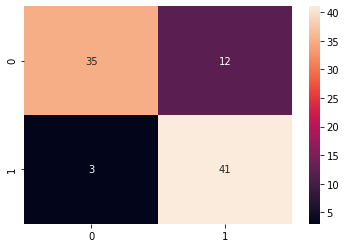

In [118]:
sns.heatmap(data=cm_lr,annot=True)
# 0 is less chance of heart attack and 1 is higher chance of heart attack 
#this is visual representation of confusion matrix

# Random Forest Classifier

In [119]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

model = RandomForestClassifier()
model.fit(X_train, y_train)

predictions = model.predict(X_test)
score = model.score(X_test, y_test)

print("Accuracy {0:.2f}%".format(100*accuracy_score(predictions, y_test)))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))
cm_rf=confusion_matrix(y_test, predictions)

Accuracy 86.81%
[[38  9]
 [ 3 41]]
              precision    recall  f1-score   support

           0       0.93      0.81      0.86        47
           1       0.82      0.93      0.87        44

    accuracy                           0.87        91
   macro avg       0.87      0.87      0.87        91
weighted avg       0.88      0.87      0.87        91



<AxesSubplot:>

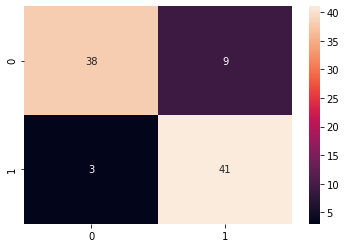

In [120]:
sns.heatmap(data=cm_rf,annot=True)
# 0 is less chance of heart attack and 1 is higher chance of heart attack 
#this is visual representation of confusion matrix

In [121]:
X_test.shape

(91, 13)

In [122]:
#%tensorflow_version 2.x 
# If you wish to use Tensorflow 1.X run the following line and then restart runtime
# %tensorflow_version 1.x 
# You'll need to change your import statements from tensorflow.keras to keras
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()

model.add(Dense(9, kernel_initializer = "uniform", activation = "relu", input_dim=13))
model.add(Dense(1, kernel_initializer = "uniform", activation = "sigmoid"))

model.compile(optimizer= "adam",loss = "binary_crossentropy",metrics = ["accuracy"])

In [123]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 9)                 126       
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 10        
Total params: 136
Trainable params: 136
Non-trainable params: 0
_________________________________________________________________


In [124]:
batch_size = 15
epochs = 40
#change epoch and batch size for different results


history = model.fit(X_train,
                    y_train,
                    batch_size = batch_size,
                    epochs = epochs,
                    verbose = 1,
                    validation_data = (X_test, y_test))

score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/40
15/15 [==============================] - 1s 17ms/step - loss: 0.6927 - accuracy: 0.6010 - val_loss: 0.6907 - val_accuracy: 0.6264
Epoch 2/40
15/15 [==============================] - 0s 6ms/step - loss: 0.6888 - accuracy: 0.7361 - val_loss: 0.6862 - val_accuracy: 0.7363
Epoch 3/40
15/15 [==============================] - 0s 6ms/step - loss: 0.6841 - accuracy: 0.7534 - val_loss: 0.6787 - val_accuracy: 0.8022
Epoch 4/40
15/15 [==============================] - 0s 6ms/step - loss: 0.6755 - accuracy: 0.7660 - val_loss: 0.6672 - val_accuracy: 0.8022
Epoch 5/40
15/15 [==============================] - 0s 6ms/step - loss: 0.6587 - accuracy: 0.8246 - val_loss: 0.6505 - val_accuracy: 0.8352
Epoch 6/40
15/15 [==============================] - 0s 6ms/step - loss: 0.6405 - accuracy: 0.8290 - val_loss: 0.6299 - val_accuracy: 0.8462
Epoch 7/40
15/15 [==============================] - 0s 7ms/step - loss: 0.6252 - accuracy: 0.7987 - val_loss: 0.6059 - val_accuracy: 0.8352
Epoch 8/40
15/15 [=

In [125]:
predictions = model.predict(X_test)
predictions = (predictions > 0.5)

print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

[[36 11]
 [ 3 41]]
              precision    recall  f1-score   support

           0       0.92      0.77      0.84        47
           1       0.79      0.93      0.85        44

    accuracy                           0.85        91
   macro avg       0.86      0.85      0.85        91
weighted avg       0.86      0.85      0.85        91



Above all the results are based pn different training data,for number of different iterations Neural network and random forest classifiers looks fine with accuracy between 80 -85
hopefully after fyrther evalution i can improve this  models tuning